In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\lokes\Desktop\unternehmer tum project\monatszahlen2510_verkehrsunfaelle_30_10_25.csv')

In [3]:
data.head(10)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2025,202501,NaN,24.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2025,202502,NaN,28.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2025,202503,NaN,25.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2025,202504,NaN,38.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2025,202505,NaN,32.0,NaN,NaN,NaN
5,Alkoholunfälle,insgesamt,2025,202506,NaN,55.0,NaN,NaN,NaN
6,Alkoholunfälle,insgesamt,2025,202507,NaN,45.0,NaN,NaN,NaN
7,Alkoholunfälle,insgesamt,2025,202508,NaN,47.0,NaN,NaN,NaN
8,Alkoholunfälle,insgesamt,2025,202509,NaN,46.0,NaN,NaN,NaN
9,Alkoholunfälle,insgesamt,2025,202510,NaN,37.0,NaN,NaN,NaN


In [4]:
data.shape


(2352, 9)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      2352 non-null   object 
 1   AUSPRAEGUNG                     2352 non-null   object 
 2   JAHR                            2352 non-null   int64  
 3   MONAT                           2352 non-null   object 
 4   WERT                            2268 non-null   float64
 5   VORJAHRESWERT                   2268 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        2092 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  2183 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        2100 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 165.5+ KB


In [6]:
data.isnull().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                               84
VORJAHRESWERT                      84
VERAEND_VORMONAT_PROZENT          260
VERAEND_VORJAHRESMONAT_PROZENT    169
ZWOELF_MONATE_MITTELWERT          252
dtype: int64

In [7]:
data.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')

MONATSZAHL
Verkehrsunfälle    1008
Alkoholunfälle      672
Fluchtunfälle       672
Name: count, dtype: int64


<Axes: xlabel='MONATSZAHL'>

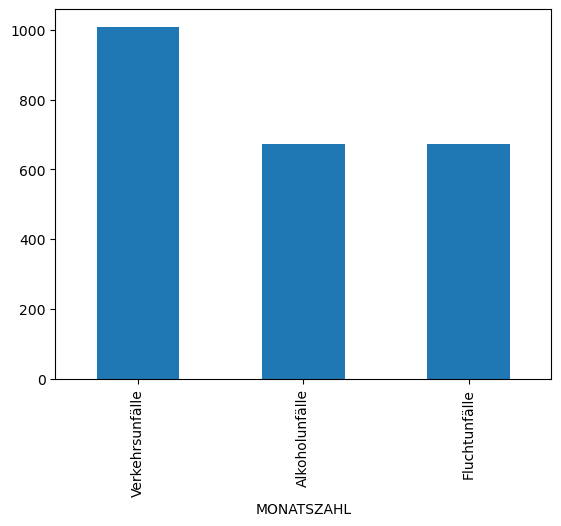

In [9]:
print(data['MONATSZAHL'].value_counts())
data['MONATSZAHL'].value_counts().plot(kind='bar')


In [10]:
# Check unique categories
print("Unique accident categories:")
print(data['MONATSZAHL'].unique())
print("\nUnique types:")
print(data['AUSPRAEGUNG'].unique())

Unique accident categories:
['Alkoholunfälle' 'Fluchtunfälle' 'Verkehrsunfälle']

Unique types:
['insgesamt' 'Verletzte und Getötete' 'mit Personenschäden']


In [11]:
# Filter for Alkoholunfälle (alcohol-related accidents) and 'insgesamt' (total)
df_filtered = data[
    (data['MONATSZAHL'].str.contains('Alkohol', case=False, na=False)) & 
    (data['AUSPRAEGUNG'] == 'insgesamt')
].copy()

# Remove summary rows
df_filtered = df_filtered[df_filtered['MONAT'] != 'Summe'].copy()

# Keep only data up to 2020 (as per challenge instructions)
df_filtered = df_filtered[df_filtered['JAHR'] <= 2020].copy()

# Extract month number from MONAT column (format: YYYYMM)
df_filtered['MONAT_NUM'] = df_filtered['MONAT'].astype(str).str[-2:].astype(int)

# Drop rows with missing WERTs
df_filtered = df_filtered.dropna(subset=['WERT'])

# Sort by year and month
df_filtered = df_filtered.sort_values(['JAHR', 'MONAT_NUM']).reset_index(drop=True)

print(f"Filtered data shape: {df_filtered.shape}")
print(f"Date range: {df_filtered['JAHR'].min()} to {df_filtered['JAHR'].max()}")
print(f"Total months: {len(df_filtered)}")

Filtered data shape: (252, 10)
Date range: 2000 to 2020
Total months: 252


In [12]:
df_filtered.isnull().sum()

MONATSZAHL                         0
AUSPRAEGUNG                        0
JAHR                               0
MONAT                              0
WERT                               0
VORJAHRESWERT                     12
VERAEND_VORMONAT_PROZENT           1
VERAEND_VORJAHRESMONAT_PROZENT    12
ZWOELF_MONATE_MITTELWERT           0
MONAT_NUM                          0
dtype: int64

In [13]:
df_filtered[['JAHR', 'MONAT_NUM', 'WERT']].head(40)

,JAHR,MONAT_NUM,WERT
0,2000,1,78.0
1,2000,2,53.0
2,2000,3,73.0
3,2000,4,78.0
4,2000,5,96.0
5,2000,6,57.0
6,2000,7,99.0
7,2000,8,77.0
8,2000,9,84.0
9,2000,10,83.0


In [14]:
# Basic statistics
print("Statistical Summary:")
print("="*50)
print(f"Mean accidents per month: {df_filtered['WERT'].mean():.2f}")
print(f"Median accidents per month: {df_filtered['WERT'].median():.2f}")
print(f"Std deviation: {df_filtered['WERT'].std():.2f}")
print(f"Min accidents: {df_filtered['WERT'].min():.0f}")
print(f"Max accidents: {df_filtered['WERT'].max():.0f}")
print(f"\nTotal accidents (2000-2020): {df_filtered['WERT'].sum():.0f}")

Statistical Summary:
Mean accidents per month: 43.75
Median accidents per month: 40.00
Std deviation: 18.07
Min accidents: 10
Max accidents: 107

Total accidents (2000-2020): 11026


In [15]:
# Yearly statistics
yearly_stats = df_filtered.groupby('JAHR')['WERT'].agg(['count', 'sum', 'mean', 'std']).round(2)
yearly_stats.columns = ['Months', 'Total', 'Average', 'Std Dev']
print("\nYearly Statistics:")
yearly_stats


Yearly Statistics:


,Months,Total,Average,Std Dev
JAHR,,,,
2000,12,934.0,77.83,13.54
2001,12,848.0,70.67,14.37
2002,12,803.0,66.92,18.41
2003,12,730.0,60.83,12.39
2004,12,659.0,54.92,12.04
2005,12,600.0,50.00,11.28
2006,12,599.0,49.92,7.83
2007,12,560.0,46.67,11.15
2008,12,482.0,40.17,11.65


In [16]:
# Monthly seasonality
monthly_stats = df_filtered.groupby('MONAT_NUM')['WERT'].agg(['mean', 'std']).round(2)
monthly_stats.columns = ['Average', 'Std Dev']
monthly_stats.index.name = 'Month'
print("\nMonthly Seasonality (Average across all years):")
monthly_stats


Monthly Seasonality (Average across all years):


,Average,Std Dev
Month,,
1,33.57,17.00
2,32.00,13.15
3,36.19,15.54
4,39.95,14.96
5,49.81,18.13
6,47.62,14.86
7,57.05,16.28
8,46.71,13.47
9,57.67,21.55


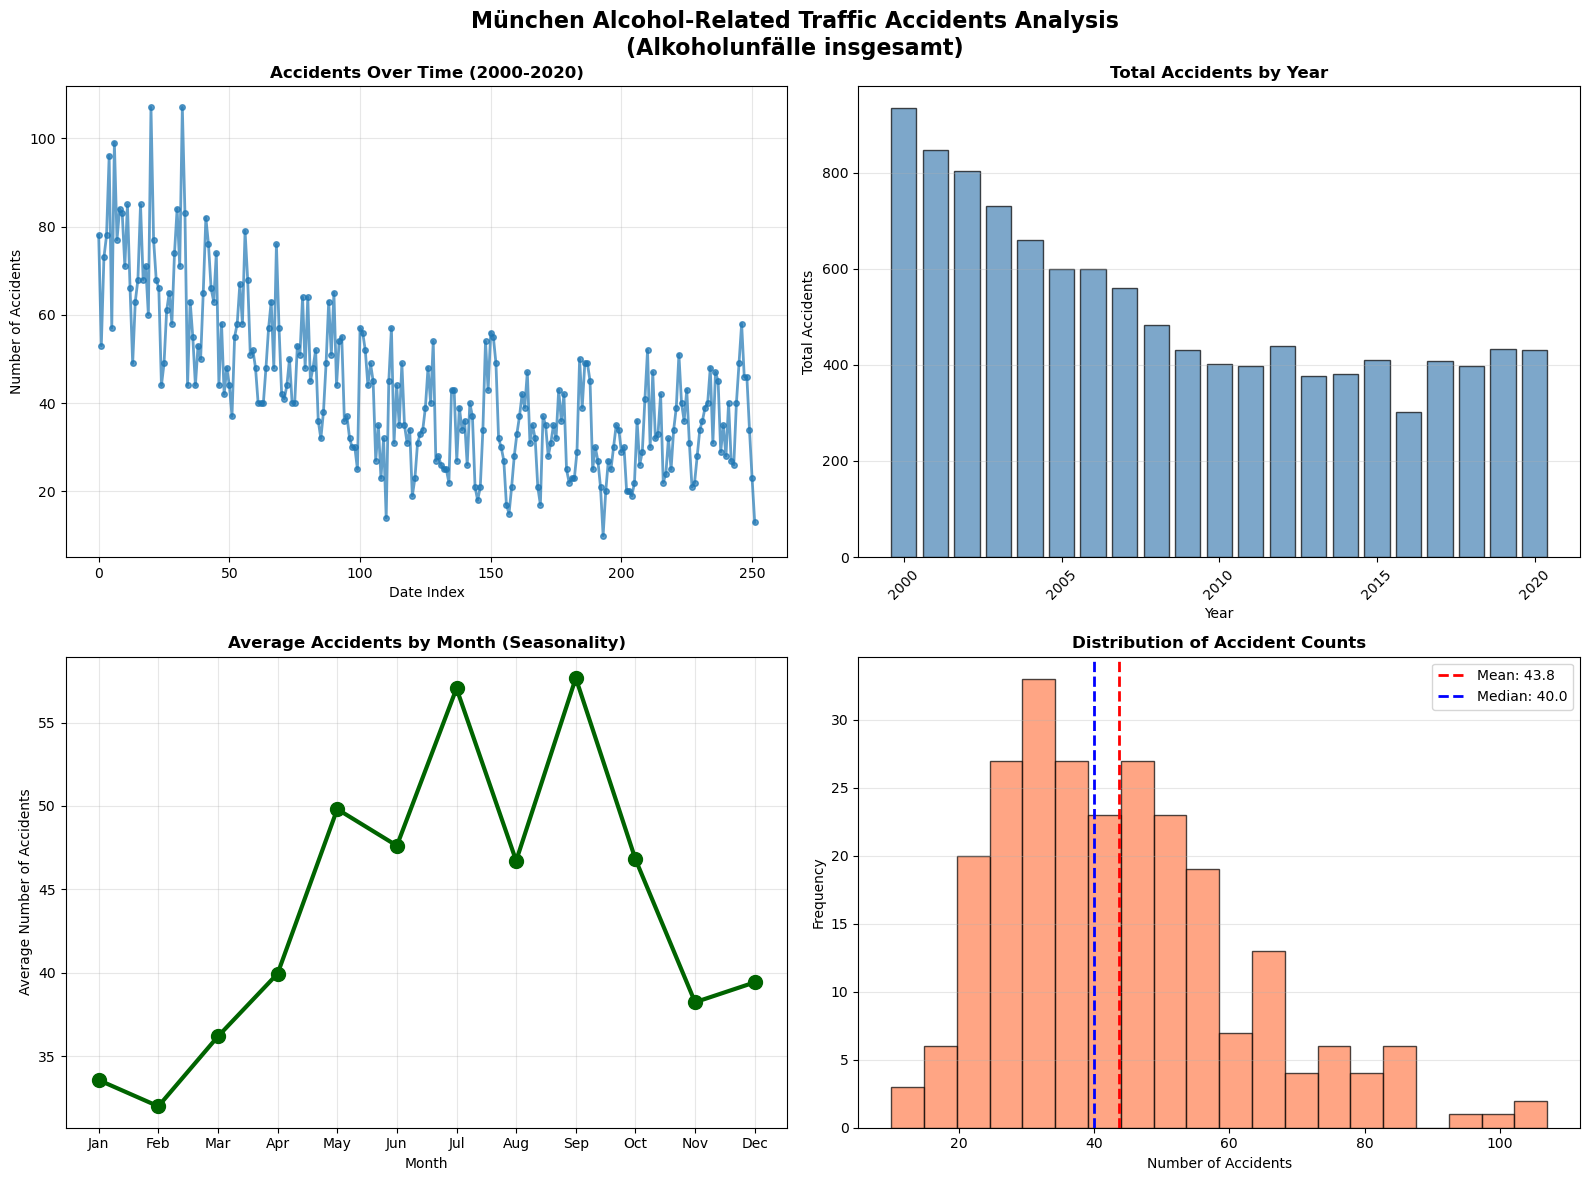

In [17]:
#  visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('München Alcohol-Related Traffic Accidents Analysis\n(Alkoholunfälle insgesamt)', 
             fontsize=16, fontweight='bold')

# Plot 1: Time series
ax1 = axes[0, 0]
ax1.plot(df_filtered.index, df_filtered['WERT'], marker='o', linewidth=2, markersize=4, alpha=0.7)
ax1.set_title('Accidents Over Time (2000-2020)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date Index')
ax1.set_ylabel('Number of Accidents')
ax1.grid(True, alpha=0.3)

# Plot 2: By year
ax2 = axes[0, 1]
yearly_data = df_filtered.groupby('JAHR')['WERT'].sum().reset_index()
ax2.bar(yearly_data['JAHR'], yearly_data['WERT'], alpha=0.7, color='steelblue', edgecolor='black')
ax2.set_title('Total Accidents by Year', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Accidents')
ax2.grid(True, alpha=0.3, axis='y')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Seasonality (by month)
ax3 = axes[1, 0]
monthly_avg = df_filtered.groupby('MONAT_NUM')['WERT'].mean().reset_index()
ax3.plot(monthly_avg['MONAT_NUM'], monthly_avg['WERT'], marker='o', 
         linewidth=3, markersize=10, color='darkgreen')
ax3.set_title('Average Accidents by Month (Seasonality)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Month')
ax3.set_ylabel('Average Number of Accidents')
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax3.grid(True, alpha=0.3)

# Plot 4: Distribution
ax4 = axes[1, 1]
ax4.hist(df_filtered['WERT'], bins=20, alpha=0.7, color='coral', edgecolor='black')
ax4.axvline(df_filtered['WERT'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {df_filtered["WERT"].mean():.1f}')
ax4.axvline(df_filtered['WERT'].median(), color='blue', linestyle='--', 
            linewidth=2, label=f'Median: {df_filtered["WERT"].median():.1f}')
ax4.set_title('Distribution of Accident Counts', fontsize=12, fontweight='bold')
ax4.set_xlabel('Number of Accidents')
ax4.set_ylabel('Frequency')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('historical_accidents_visualization.png', dpi=300, bbox_inches='tight')
plt.show()


In [18]:
# Create features for machine learning
df_features = df_filtered.copy()

# Basic features
df_features['year'] = df_features['JAHR']
df_features['month'] = df_features['MONAT_NUM']

# Cyclical features for month (sine and cosine to capture seasonality)
df_features['month_sin'] = np.sin(2 * np.pi * df_features['month'] / 12)
df_features['month_cos'] = np.cos(2 * np.pi * df_features['month'] / 12)

# Time index
df_features['time_idx'] = (df_features['year'] - df_features['year'].min()) * 12 + df_features['month']

# Lag features 
df_features['lag_1'] = df_features['WERT'].shift(1)
df_features['lag_2'] = df_features['WERT'].shift(2)
df_features['lag_3'] = df_features['WERT'].shift(3)
df_features['lag_12'] = df_features['WERT'].shift(12)  

# Rolling statistics
df_features['rolling_mean_3'] = df_features['WERT'].rolling(window=3, min_periods=1).mean().shift(1)
df_features['rolling_mean_6'] = df_features['WERT'].rolling(window=6, min_periods=1).mean().shift(1)
df_features['rolling_std_3'] = df_features['WERT'].rolling(window=3, min_periods=1).std().shift(1)

# Drop rows with NaN values created by lag features
df_features = df_features.dropna()

print(f"Features created. Shape: {df_features.shape}")
print(f"\nFeature columns: {df_features.columns.tolist()}")



Features created. Shape: (240, 22)

Feature columns: ['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT', 'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT', 'ZWOELF_MONATE_MITTELWERT', 'MONAT_NUM', 'year', 'month', 'month_sin', 'month_cos', 'time_idx', 'lag_1', 'lag_2', 'lag_3', 'lag_12', 'rolling_mean_3', 'rolling_mean_6', 'rolling_std_3']


In [19]:
df_features[['year', 'month', 'month_sin', 'month_cos', 'time_idx',
                'lag_1', 'lag_2', 'lag_3', 'lag_12',
                'rolling_mean_3', 'rolling_mean_6', 'rolling_std_3']].head(15)

,year,month,month_sin,month_cos,time_idx,lag_1,lag_2,lag_3,lag_12,rolling_mean_3,rolling_mean_6,rolling_std_3
12,2001,1,5.000000e-01,8.660254e-01,13,85.0,71.0,83.0,78.0,79.666667,83.166667,7.571878
13,2001,2,8.660254e-01,5.000000e-01,14,66.0,85.0,71.0,53.0,74.000000,77.666667,9.848858
14,2001,3,1.000000e+00,6.123234e-17,15,49.0,66.0,85.0,73.0,66.666667,73.000000,18.009257
15,2001,4,8.660254e-01,-5.000000e-01,16,63.0,49.0,66.0,78.0,59.333333,69.500000,9.073772
16,2001,5,5.000000e-01,-8.660254e-01,17,68.0,63.0,49.0,96.0,60.000000,67.000000,9.848858
17,2001,6,1.224647e-16,-1.000000e+00,18,85.0,68.0,63.0,57.0,72.000000,69.333333,11.532563
18,2001,7,-5.000000e-01,-8.660254e-01,19,68.0,85.0,68.0,99.0,73.666667,66.500000,9.814955
19,2001,8,-8.660254e-01,-5.000000e-01,20,71.0,68.0,85.0,77.0,74.666667,67.333333,9.073772
20,2001,9,-1.000000e+00,-1.836970e-16,21,60.0,71.0,68.0,84.0,66.333333,69.166667,5.686241
21,2001,10,-8.660254e-01,5.000000e-01,22,107.0,60.0,71.0,83.0,79.333333,76.500000,24.583192


In [20]:
# Define features and target
feature_cols = ['year', 'month', 'month_sin', 'month_cos', 'time_idx',
                'lag_1', 'lag_2', 'lag_3', 'lag_12',
                'rolling_mean_3', 'rolling_mean_6', 'rolling_std_3']

X = df_features[feature_cols]
y = df_features['WERT']  # Using WERT directly

# Split data: train on all data up to 2019, test on 2020
train_mask = df_features['year'] < 2020
test_mask = df_features['year'] == 2020

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")
print(f"\nTraining period: {df_features[train_mask]['year'].min()}-{df_features[train_mask]['year'].max()}")
print(f"Test period: {df_features[test_mask]['year'].min()}-{df_features[test_mask]['year'].max()}")

Training set size: 228 samples
Test set size: 12 samples

Training period: 2001-2019
Test period: 2020-2020


In [21]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)